# K-Means Clustering

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
df["age"] = df['age'].fillna(df['age'].mean())

{'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 8, 'n_init': 'auto', 'random_state': None, 'tol': 0.0001, 'verbose': 0}

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale Data
X = df[['age','fare']]
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

# KMeans
model = KMeans(n_clusters=5,random_state=42)
model.fit(X_scale)

# Assign Label (Cluster)
df['cluster'] = model.labels_

In [15]:
df['cluster'].unique()

array([2, 1, 0, 4, 3], dtype=int32)

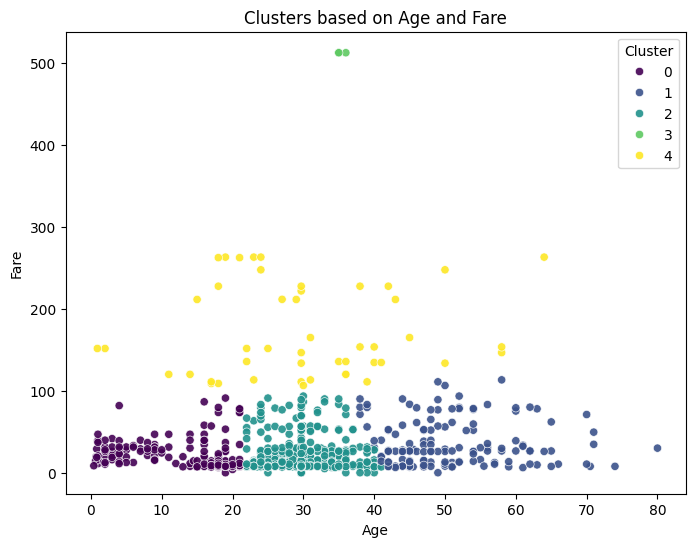

In [16]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='fare', hue='cluster', palette='viridis', alpha=0.9)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Clusters based on Age and Fare')
plt.legend(title='Cluster')
plt.show()


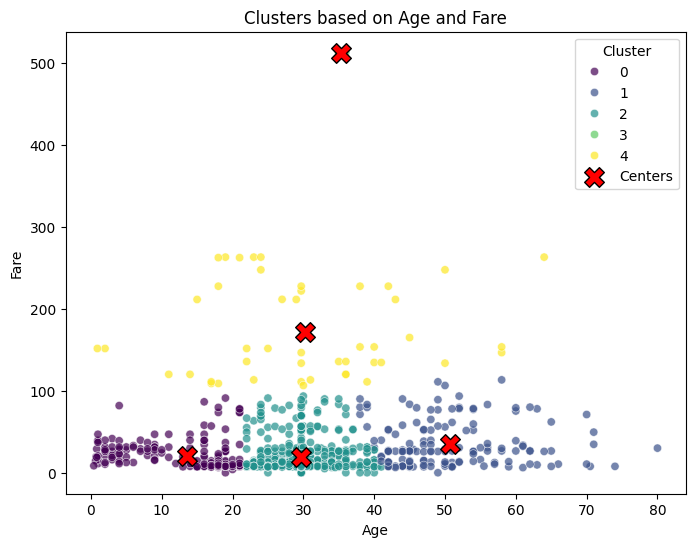

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get cluster centers (inverse transform to original scale)
centers = scaler.inverse_transform(model.cluster_centers_)

# Set figure size
plt.figure(figsize=(8, 6))

# Scatter plot using seaborn
sns.scatterplot(data=df, x='age', y='fare', hue='cluster', palette='viridis', alpha=0.7)

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, edgecolors='black', label='Centers')

# Labels and Title
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Clusters based on Age and Fare')
plt.legend(title='Cluster')
plt.show()


In [18]:
import plotly.express as px

fig = px.scatter(df, x='age', y='fare',color='cluster', 
                 opacity=0.9,color_continuous_scale='viridis',
                 title='Clusters based on Age and Fare',
                 labels={'age': 'Age', 'fare': 'Fare', 'cluster': 'Cluster'})

fig.show()


In [19]:
import plotly.express as px

fig = px.scatter_3d(df, x='age', y='fare',color='cluster',z='pclass', 
                 opacity=0.9,color_continuous_scale='viridis',
                 title='Clusters based on Age and Fare',
                 labels={'age': 'Age', 'fare': 'Fare', 'cluster': 'Cluster'})

fig.show()


In [20]:
fig = px.parallel_coordinates(df,color="cluster")
fig.show()